In [1]:
using Pkg; 
Pkg.activate(".")

"/Users/mcfefa/Dropbox/Papers in Progress/Diversity-Score-Theory-Paper/code/Project.toml"

In [2]:
using DifferentialEquations, Plots;

┌ Info: Recompiling stale cache file /Users/mcfefa/.julia/compiled/v1.0/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184


In [3]:
using Random, DataFrames, Query; 

┌ Info: Recompiling stale cache file /Users/mcfefa/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/mcfefa/.julia/compiled/v1.0/Query/wGX7b.ji for Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1184


In [405]:
using Dates;

## Two Population Game

#### Function Definitions

In [29]:
struct Die
    nsides::Int # number of sides
end

In [94]:
Random.rand(rng::AbstractRNG, d::Random.SamplerTrivial{Die}) = rand(rng, 1:d[].nsides)

In [511]:
function calcqD_2D(freq, q)
    diversity = 0.0; 
    qD = zeros(length(q))
    for i in 1:length(q)
        if q[i] == 1
            #log((freq)^(freq))
            for row in 1:length(freq)[1]
              diversity = diversity .+ log.((freq[row]).^(freq[row]))
            end 
          return diversity = abs(diversity)
        else
            #qD[i] = freq.^q[i] .^ (1 ./ (1 .- q[i]))
            for row in 1:length(freq)[1]
                diversity = diversity .+ (freq[row]).^q
            end
            return diversity = diversity.^(1 ./(1 .- q))
        end    
    end
    
end

calcqD_2D (generic function with 1 method)

In [35]:
function findInflection(q::Array, qD::Array)
    approxLogDeriv = q[2:end].*diff(qD)./diff(q);
    return approxLogDeriv; 
end

findInflection (generic function with 1 method)

In [36]:
function findInflectionLocal(approx::Array)
    return argmin((approx))
end

findInflectionLocal (generic function with 1 method)

In [37]:
function reportInflection(q::Array, qD::Array)
    diffVector = findInflection(q, qD)
    inflectPt = findInflectionLocal(diffVector)
    slopeInflectPt = abs(diffVector[inflectPt])
    qInflecPt = q[inflectPt+1]
    return (qInflecPt, slopeInflectPt)
end

reportInflection (generic function with 1 method)

#### Hawk-Dove Game

In [51]:
# Hawks = x; Doves = 1-x
V = 4 #rand()
C = 3 #rand()

payOffMtx = [ 0.5*(V-C) V;
                0       0.5*V]

2×2 Array{Float64,2}:
 0.5  4.0
 0.0  2.0

In [52]:
## Define replicator dynamics
f(u,p,t) = u*( payOffMtx[1,1]*u + payOffMtx[1,2]*(1-u) - 
    ((u^2)*payOffMtx[1,1] + u*payOffMtx[1,2]*(1-u) + u*payOffMtx[2,1]*(1-u) + payOffMtx[2,2]*(1-u)^2) )

f (generic function with 1 method)

In [401]:
u0 = 0.001;
tspan = (0, 20.0);

In [402]:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,reltol=1e-6,saveat=0.1); 

In [403]:
hawk = sol.u
dove =  1 .- hawk;

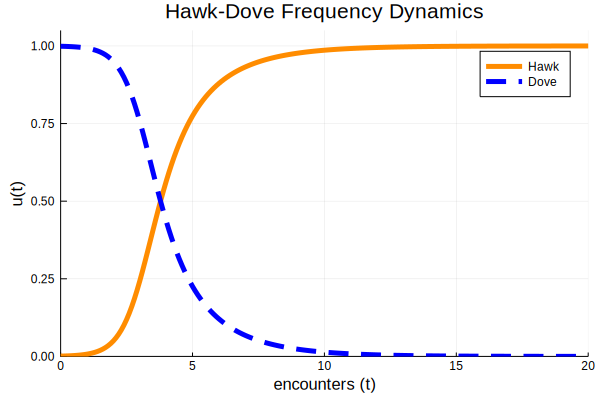

In [407]:
p = plot(sol,linewidth=5,title="Hawk-Dove Frequency Dynamics",
     xaxis="encounters (t)",yaxis="u(t)",label="Hawk",color="DarkOrange")
plot!(p, sol.t,dove,linewidth=5,ls=:dash,color=:blue,label="Dove", ylims=(0,1.05))

In [408]:
savefig(p, string("Hawk-Dove_FreqDynamics_overTime_",Dates.today(),".pdf"))

In [95]:
q = exp10.(range(-2.0, stop=2.0, length=100));

In [479]:
divMetrics_HD = DataFrame()
cn = ["timePt","LowQ", "HighQ", "IPq", "IPslope"];
for c in cn
    divMetrics_HD[Symbol(c)] = 0.0
end
divMetrics_HD = divMetrics_HD[2:end,:]

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] = [v]` when `df` has zero columns
│   caller = top-level scope at In[479]:4
└ @ Core ./In[479]:4


,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64


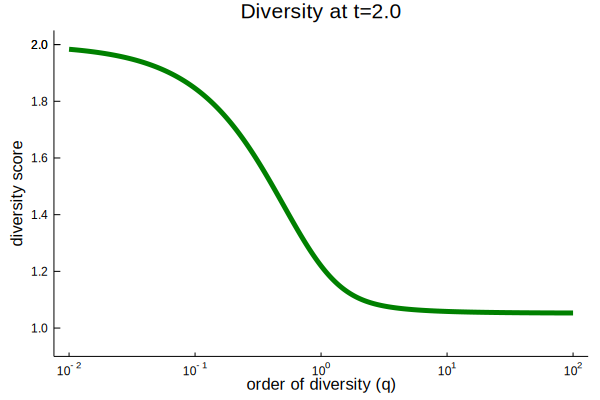

In [611]:
loc = rand(Die(length(hawk)))
loc = 21
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p1 = plot(q,hawkdove_div, linewidth=5, ylims=(0.9,2.05), grid=false,color=:green, legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [612]:
savefig(p1, string("Hawk-Dove_DiversityCurve_at-t-2_",Dates.today(),".pdf"))

In [512]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111


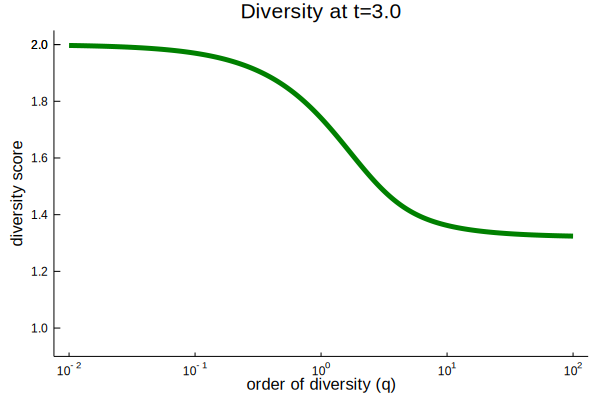

In [609]:
loc = rand(Die(length(hawk)))
loc = 31
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p2 = plot(q,hawkdove_div, linewidth=5, color=:green,ylims=(0.9,2.05), grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [610]:
savefig(p2, string("Hawk-Dove_DiversityCurve_at-t-3_",Dates.today(),".pdf"))

In [528]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111
2,3.0,1.99693,1.32438,1.71488,0.239651


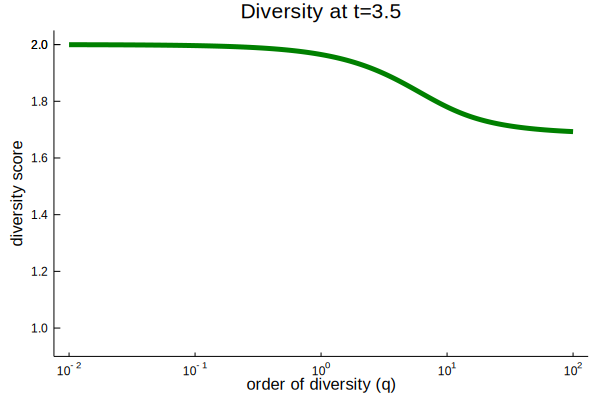

In [607]:
loc = rand(Die(length(hawk)))
loc = 36
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p3 = plot(q,hawkdove_div, linewidth=5, color=:green,ylims=(0.9,2.05), grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [608]:
savefig(p3, string("Hawk-Dove_DiversityCurve_at-t-3.5_",Dates.today(),".pdf"))

In [531]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111
2,3.0,1.99693,1.32438,1.71488,0.239651
3,3.5,1.99964,1.69299,6.1205,0.109248


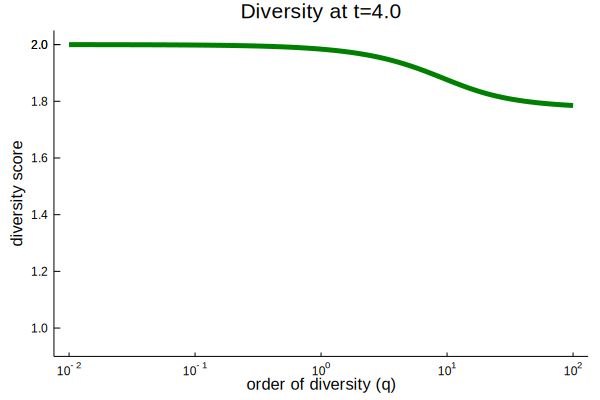

In [605]:
loc = rand(Die(length(hawk)))
loc = 41
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p4 = plot(q,hawkdove_div, linewidth=5, ylims=(0.9,2.05),color=:green,grid=false, legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")

In [606]:
savefig(p4, string("Hawk-Dove_DiversityCurve_at-t-4_",Dates.today(),".pdf"))

In [534]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111
2,3.0,1.99693,1.32438,1.71488,0.239651
3,3.5,1.99964,1.69299,6.1205,0.109248
4,4.0,1.99984,1.78516,9.44006,0.0775584


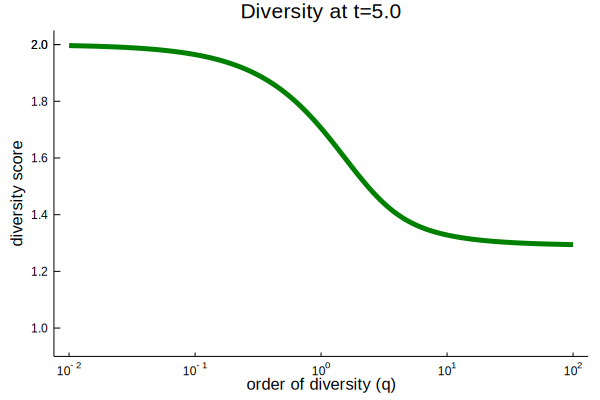

In [603]:
loc = rand(Die(length(hawk)))
loc = 51
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p5 = plot(q,hawkdove_div, linewidth=5, ylims=(0.9,2.05),color=:green, grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [604]:
savefig(p5, string("Hawk-Dove_DiversityCurve_at-t-5_",Dates.today(),".pdf"))

In [537]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111
2,3.0,1.99693,1.32438,1.71488,0.239651
3,3.5,1.99964,1.69299,6.1205,0.109248
4,4.0,1.99984,1.78516,9.44006,0.0775584
5,5.0,1.99642,1.29442,1.5495,0.25062


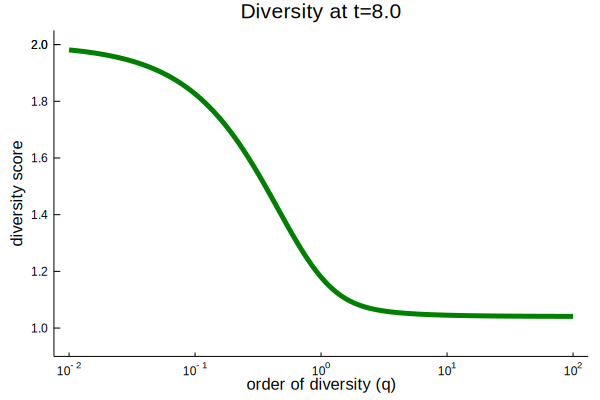

In [601]:
loc = rand(Die(length(hawk)))
loc = 81
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p6 = plot(q,hawkdove_div, linewidth=5, color=:green, ylims=(0.9,2.05),grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [602]:
savefig(p6, string("Hawk-Dove_DiversityCurve_at-t-8_",Dates.today(),".pdf"))

In [540]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111
2,3.0,1.99693,1.32438,1.71488,0.239651
3,3.5,1.99964,1.69299,6.1205,0.109248
4,4.0,1.99984,1.78516,9.44006,0.0775584
5,5.0,1.99642,1.29442,1.5495,0.25062
6,8.0,1.98122,1.04119,0.45463,0.350111


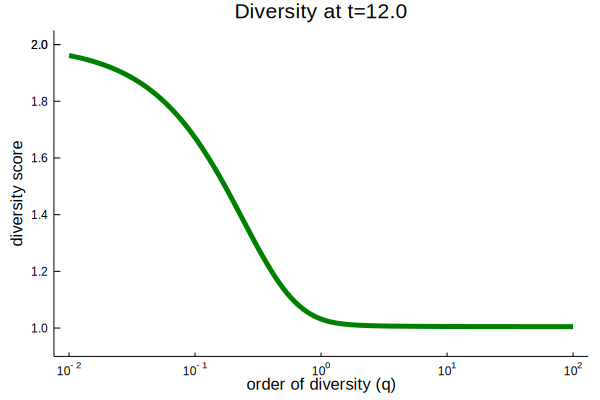

In [599]:
loc = rand(Die(length(hawk)))
loc = 121
df = DataFrame(species=["hawk","dove"], freq=[hawk[loc],dove[loc]])
hawkdove_div = calcqD_2D(transpose(df[:,2]),q);
p7 = plot(q,hawkdove_div, linewidth=5, color=:green, ylims=(0.9,2.05), grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [600]:
savefig(p7, string("Hawk-Dove_DiversityCurve_at-t-12_",Dates.today(),".pdf"))

In [572]:
hawkdove_IP_q, hawkdove_IP_slope = reportInflection(q,hawkdove_div)
tmpdf = [sol.t[loc],hawkdove_div[1],hawkdove_div[end],hawkdove_IP_q, hawkdove_IP_slope]
push!(divMetrics_HD,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,1.0,1.98122,1.04119,0.45463,0.350111
2,3.0,1.99693,1.32438,1.71488,0.239651
3,3.5,1.99964,1.69299,6.1205,0.109248
4,4.0,1.99984,1.78516,9.44006,0.0775584
5,5.0,1.99642,1.29442,1.5495,0.25062
6,8.0,1.98122,1.04119,0.45463,0.350111
7,12.0,1.96147,1.00505,0.240648,0.369026


#### Stag Hunt Game
Can achieve stable coexistence

In [354]:
a = 10 #rand()
b = 4 #rand()
c = 0.4
d = 2

payOffMtxSH = [ a b;
              c d]

2×2 Array{Float64,2}:
 10.0  4.0
  0.4  2.0

In [355]:
## Define replicator dynamics
staghunt(u,p,t) = u* (payOffMtxSH[1,1]-payOffMtxSH[1,2])*u + payOffMtxSH[1,2]*(1-u) - 
    u*((payOffMtxSH[1,1]-payOffMtxSH[1,2])*u + payOffMtxSH[1,2]) - (1-u)*((payOffMtxSH[2,1]-payOffMtxSH[2,2])*u + payOffMtxSH[2,2])

staghunt (generic function with 1 method)

In [356]:
u0 = 0.75;
tspan = (0, 2.0);

In [357]:
probSH = ODEProblem(staghunt,u0,tspan)
solSH = solve(probSH,reltol=1e-6,saveat=0.05); 

In [358]:
stag = solSH.u
hare =  1 .- stag;

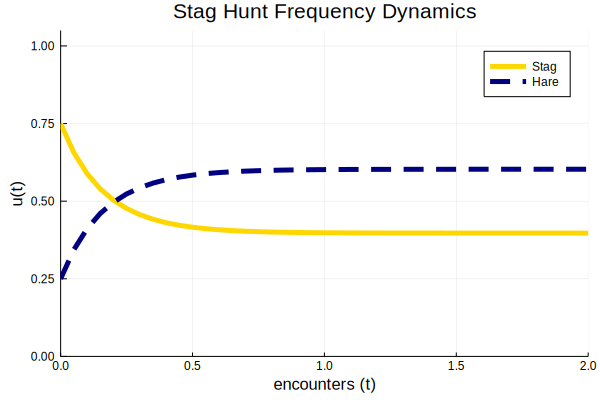

In [467]:
pSH = plot(solSH,linewidth=5,title="Stag Hunt Frequency Dynamics",
     xaxis="encounters (t)",yaxis="u(t)",label="Stag",color=:gold)
plot!(pSH, solSH.t,hare,linewidth=5,ls=:dash,color=:navy,label="Hare", ylims=(0,1.05))

In [468]:
savefig(pSH, string("Stag-Hunt_FreqDynamics_overTime_",Dates.today(),".pdf"))

In [541]:
divMetrics_SH = DataFrame()
cnSH = ["timePt","LowQ", "HighQ", "IPq", "IPslope"];
for c in cnSH
    divMetrics_SH[Symbol(c)] = 0.0
end
divMetrics_SH = divMetrics_SH[2:end,:]

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] = [v]` when `df` has zero columns
│   caller = top-level scope at In[541]:4
└ @ Core ./In[541]:4


,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64


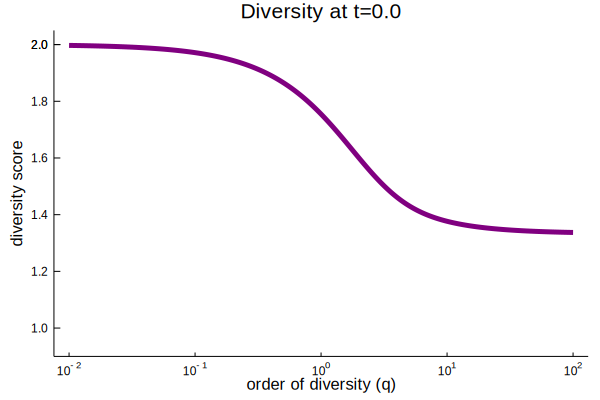

In [593]:
loc = rand(Die(length(stag)))
loc = 1
dfSH = DataFrame(species=["stag","hare"], freq=[stag[loc],hare[loc]])
staghunt_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH1 = plot(q,staghunt_div, linewidth=5, ylims=(0.90,2.05), color=:purple, grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [594]:
savefig(pSH1, string("Stag-Hunt_DiversityCurve_at-t-0_",Dates.today(),".pdf"))

In [544]:
staghunt_IP_q, staghunt_IP_slope = reportInflection(q,staghunt_div)
tmpdf = [sol.t[loc],staghunt_div[1],staghunt_div[end],staghunt_IP_q, staghunt_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.99713,1.33721,1.7793,0.234979


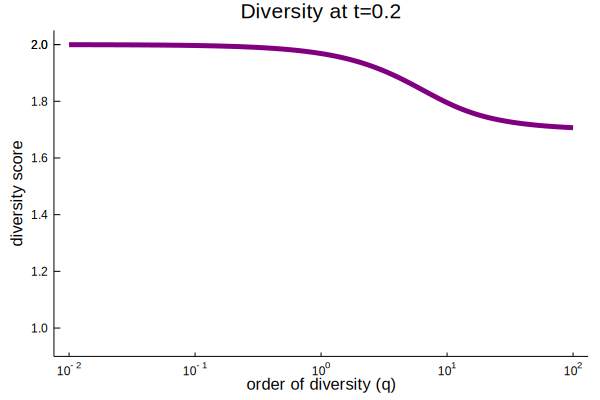

In [595]:
loc = rand(Die(length(stag)))
loc = 3
dfSH = DataFrame(species=["stag","hare"], freq=[stag[loc],hare[loc]])
staghunt_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH2 = plot(q,staghunt_div, linewidth=5, ylims=(0.9,2.05), color=:purple, grid=false,legend=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [596]:
savefig(pSH2, string("Stag-Hunt_DiversityCurve_at-t-0.2_",Dates.today(),".pdf"))

In [547]:
staghunt_IP_q, staghunt_IP_slope = reportInflection(q,staghunt_div)
tmpdf = [sol.t[loc],staghunt_div[1],staghunt_div[end],staghunt_IP_q, staghunt_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.99713,1.33721,1.7793,0.234979
2,0.2,1.99968,1.70683,6.46861,0.104474


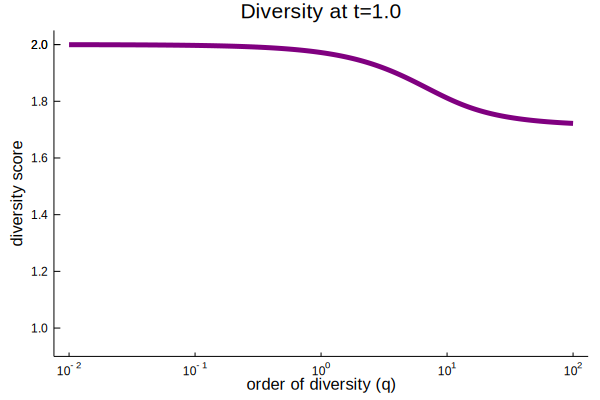

In [597]:
loc = rand(Die(length(stag)))
loc = 11
dfSH = DataFrame(species=["stag","hare"], freq=[stag[loc],hare[loc]])
staghunt_div = calcqD_2D(transpose(dfSH[:,2]),q);
pSH3 = plot(q,staghunt_div, linewidth=5, color=:purple, ylims=(0.9,2.05), legend=false,grid=false, title = string("Diversity at t=",sol.t[loc]), xaxis=("order of diversity (q)", :log), yaxis="diversity score")


In [598]:
savefig(pSH3, string("Stag-Hunt_DiversityCurve_at-t-1_",Dates.today(),".pdf"))

In [550]:
staghunt_IP_q, staghunt_IP_slope = reportInflection(q,staghunt_div)
tmpdf = [sol.t[loc],staghunt_div[1],staghunt_div[end],staghunt_IP_q, staghunt_IP_slope]
push!(divMetrics_SH,tmpdf)

,timePt,LowQ,HighQ,IPq,IPslope
,Float64,Float64,Float64,Float64,Float64
1,0.0,1.99713,1.33721,1.7793,0.234979
2,0.2,1.99968,1.70683,6.46861,0.104474
3,1.0,1.99971,1.722,6.89984,0.099245
